In [1]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector, ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
## fixing random for lesson generation
np.random.seed(321)

In [2]:
pd.set_option('display.max_columns',100)

# Data Exploration

In [3]:
# Load in the dataframe from project part 1 as basics:
df = pd.read_csv('Data/combined_tmdb_data.csv.gz')
df.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification\r
0,tt0312305,0.0,/lqUbt2cy2pnqvxKefbQAtxLS0WA.jpg,NaN,0.0,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",http://www.qqthemovie.com/,23738.0,en,Quantum Quest: A Cassini Space Odyssey,"Dave, a young photon, who is forced out of the...",1.619,/uneDCn8y6RHKc5IAfpgznmaan9I.jpg,[],"[{'iso_3166_1': 'US', 'name': 'United States o...",2012-12-02,0.0,45.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Quantum Quest: A Cassini Space Odyssey,0.0,7.90,8.0,\r
1,tt0326965,0.0,/xt2klJdKCVGXcoBGQrGfAS0aGDE.jpg,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",http://www.inmysleep.com,40048.0,en,In My Sleep,"A sleepwalking, sexaholic masseur wakes up, co...",3.755,/sv9o6VYUQM2AbfmlTwDTn9238R5.jpg,[],"[{'iso_3166_1': 'US', 'name': 'United States o...",2010-04-23,0.0,90.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Sleepwalking can be deadly.,In My Sleep,0.0,5.50,31.0,PG-13\r
2,tt0331312,0.0,NaN,NaN,0.0,[],NaN,214026.0,en,This Wretched Life,"Awakening from a near fatal overdose, Chris em...",0.622,/xMMehQD3VWgorYoqvlTeQXSbsFo.jpg,[],[],2010-01-01,0.0,0.0,[],Released,NaN,This Wretched Life,0.0,5.00,1.0,\r
3,tt0393049,0.0,/gc9FN5zohhzCt05RkejQIIPLtBl.jpg,NaN,300000.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,324352.0,en,Anderson's Cross,"Nick Anderson, Kevin Daniels, and Tracey Green...",1.576,/2j90os0c2HJuIjWXxMg9vMvOliw.jpg,"[{'id': 46102, 'logo_path': None, 'name': 'Ill...","[{'iso_3166_1': 'US', 'name': 'United States o...",2010-05-20,0.0,98.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Sometimes the boy next door is more than the b...,Anderson's Cross,0.0,4.00,5.0,\r
4,tt0398286,0.0,/cWczNud8Y8i8ab0Z4bxos4myWYO.jpg,NaN,260000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",http://disney.go.com/disneypictures/tangled/,38757.0,en,Tangled,When the kingdom's most wanted-and most charmi...,108.562,/ym7Kst6a4uodryxqbGOxmewF235.jpg,"[{'id': 6125, 'logo_path': '/tzsMJBJZINu7GHzrp...","[{'iso_3166_1': 'US', 'name': 'United States o...",2010-11-24,592461732.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,They're taking adventure to new lengths.,Tangled,0.0,7.59,10223.0,PG\r


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38136 entries, 0 to 38135
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                38136 non-null  object 
 1   adult                  38136 non-null  float64
 2   backdrop_path          25276 non-null  object 
 3   belongs_to_collection  2499 non-null   object 
 4   budget                 38136 non-null  float64
 5   genres                 38136 non-null  object 
 6   homepage               10063 non-null  object 
 7   id                     38136 non-null  float64
 8   original_language      38136 non-null  object 
 9   original_title         38136 non-null  object 
 10  overview               37308 non-null  object 
 11  popularity             38136 non-null  float64
 12  poster_path            35390 non-null  object 
 13  production_companies   38136 non-null  object 
 14  production_countries   38136 non-null  object 
 15  re

# Preprocessing

In [5]:
drop_cols = ['backdrop_path','backdrop_path','original_title','overview',
                 'poster_path','tagline','id','homepage',
                 'production_countries','video','production_companies','spoken_languages',
            'original_language']
df = df.drop(columns=drop_cols)
df

,imdb_id,adult,belongs_to_collection,budget,genres,popularity,release_date,revenue,runtime,status,title,vote_average,vote_count,certification\r
0,tt0312305,0.0,NaN,0.0,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",1.619,2012-12-02,0.0,45.0,Released,Quantum Quest: A Cassini Space Odyssey,7.900,8.0,\r
1,tt0326965,0.0,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",3.755,2010-04-23,0.0,90.0,Released,In My Sleep,5.500,31.0,PG-13\r
2,tt0331312,0.0,NaN,0.0,[],0.622,2010-01-01,0.0,0.0,Released,This Wretched Life,5.000,1.0,\r
3,tt0393049,0.0,NaN,300000.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",1.576,2010-05-20,0.0,98.0,Released,Anderson's Cross,4.000,5.0,\r
4,tt0398286,0.0,NaN,260000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",108.562,2010-11-24,592461732.0,100.0,Released,Tangled,7.590,10223.0,PG\r
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38131,tt9906644,0.0,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",1.448,2019-09-27,0.0,122.0,Released,Manoharam,6.125,12.0,\r
38132,tt9913660,0.0,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",0.638,2019-10-23,0.0,102.0,Released,No Apology,8.000,1.0,\r
38133,tt9913872,0.0,NaN,0.0,"[{'id': 27, 'name': 'Horror'}]",0.600,2019-01-01,0.0,0.0,Released,De la piel del Diablo,8.200,3.0,\r
38134,tt9914942,0.0,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",5.570,2019-07-12,0.0,74.0,Released,Life without Sara Amat,7.700,7.0,\r


belongs_to_collection feature

In [6]:
df['belongs_to_collection'].value_counts()

{'id': 39199, 'name': 'Detective Conan Collection', 'poster_path': '/bV6EHK0Q65hHKSoVDeACbc960jQ.jpg', 'backdrop_path': '/mwz7lYimh8da0zZHOI41xNd86yH.jpg'}    9
{'id': 148065, 'name': 'Doraemon Collection', 'poster_path': '/4TLSP1KD1uAlp2q1rTrc6SFlktX.jpg', 'backdrop_path': '/rc6OFcSasL5YxBRPUQVwxmVF6h5.jpg'}          8
{'id': 803526, 'name': 'Super Sentai Collection', 'poster_path': '/jIbtHH6ZGq4KNpiWRUajNIuiIxn.jpg', 'backdrop_path': None}                                    7
{'id': 101646, 'name': 'Vares Collection', 'poster_path': None, 'backdrop_path': None}                                                                         7
{'id': 725456, 'name': 'American Poltergeist', 'poster_path': '/blYngKjIj7FqxovoDbXwtbmJ8WF.jpg', 'backdrop_path': None}                                       7
                                                                                                                                                              ..
{'id': 448758, 'name': 'Børning Co

In [7]:
# there are 3,700+ movies that belong to collections
df['belongs_to_collection'].notna().sum()

2499

In [8]:
## Use .notna() to get True if it belongs to a collection
df['belongs_to_collection'] = df['belongs_to_collection'].notna()
df['belongs_to_collection'].value_counts()

False    35637
True      2499
Name: belongs_to_collection, dtype: int64

genres

In [9]:
df['genres'][0]

"[{'id': 10751, 'name': 'Family'}, {'id': 16, 'name': 'Animation'}, {'id': 878, 'name': 'Science Fiction'}]"

In [10]:
## Function to get just the genre names as a list 
def get_genre_name(x):
    x = x.replace("'",'"')
    x = json.loads(x)
    
    genres = []
    for genre in x:
        genres.append(genre['name'])
    return genres

In [11]:
## Use our function and exploding the new column
get_genre_name(df.loc[0,'genres'])

# use get_genre_name and convert all the genere name in list

['Family', 'Animation', 'Science Fiction']

In [12]:
## Use our function and exploding the new column
df['genres_list'] = df['genres'].apply(get_genre_name)
df_explode = df.explode('genres_list')
df_explode.head()

,imdb_id,adult,belongs_to_collection,budget,genres,popularity,release_date,revenue,runtime,status,title,vote_average,vote_count,certification\r,genres_list
0,tt0312305,0.0,False,0.0,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",1.619,2012-12-02,0.0,45.0,Released,Quantum Quest: A Cassini Space Odyssey,7.9,8.0,\r,Family
0,tt0312305,0.0,False,0.0,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",1.619,2012-12-02,0.0,45.0,Released,Quantum Quest: A Cassini Space Odyssey,7.9,8.0,\r,Animation
0,tt0312305,0.0,False,0.0,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",1.619,2012-12-02,0.0,45.0,Released,Quantum Quest: A Cassini Space Odyssey,7.9,8.0,\r,Science Fiction
1,tt0326965,0.0,False,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",3.755,2010-04-23,0.0,90.0,Released,In My Sleep,5.5,31.0,PG-13\r,Thriller
1,tt0326965,0.0,False,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",3.755,2010-04-23,0.0,90.0,Released,In My Sleep,5.5,31.0,PG-13\r,Mystery


In [13]:
## save unique genres
unique_genres = df_explode['genres_list'].dropna().unique()
unique_genres

array(['Family', 'Animation', 'Science Fiction', 'Thriller', 'Mystery',
       'Drama', 'Romance', 'Comedy', 'War', 'Crime', 'Action',
       'Adventure', 'Horror', 'Fantasy', 'History', 'Western', 'Music',
       'Documentary', 'TV Movie'], dtype=object)

In [14]:
## Manually One-Hot-Encode Genres
for genre in unique_genres:
    df[f"Genre_{genre}"] = df['genres'].str.contains(genre,regex =False)
df.head()

,imdb_id,adult,belongs_to_collection,budget,genres,popularity,release_date,revenue,runtime,status,title,vote_average,vote_count,certification\r,genres_list,Genre_Family,Genre_Animation,Genre_Science Fiction,Genre_Thriller,Genre_Mystery,Genre_Drama,Genre_Romance,Genre_Comedy,Genre_War,Genre_Crime,Genre_Action,Genre_Adventure,Genre_Horror,Genre_Fantasy,Genre_History,Genre_Western,Genre_Music,Genre_Documentary,Genre_TV Movie
0,tt0312305,0.0,False,0.0,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",1.619,2012-12-02,0.0,45.0,Released,Quantum Quest: A Cassini Space Odyssey,7.90,8.0,\r,"[Family, Animation, Science Fiction]",True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,tt0326965,0.0,False,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",3.755,2010-04-23,0.0,90.0,Released,In My Sleep,5.50,31.0,PG-13\r,"[Thriller, Mystery, Drama]",False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False
2,tt0331312,0.0,False,0.0,[],0.622,2010-01-01,0.0,0.0,Released,This Wretched Life,5.00,1.0,\r,[],False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,tt0393049,0.0,False,300000.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",1.576,2010-05-20,0.0,98.0,Released,Anderson's Cross,4.00,5.0,\r,"[Romance, Comedy, Drama]",False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False
4,tt0398286,0.0,False,260000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",108.562,2010-11-24,592461732.0,100.0,Released,Tangled,7.59,10223.0,PG\r,"[Animation, Family]",True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [15]:
## Save only Released status
df = df.loc[ df['status'] == 'Released']
df = df.drop(columns=['status'])
df

,imdb_id,adult,belongs_to_collection,budget,genres,popularity,release_date,revenue,runtime,title,vote_average,vote_count,certification\r,genres_list,Genre_Family,Genre_Animation,Genre_Science Fiction,Genre_Thriller,Genre_Mystery,Genre_Drama,Genre_Romance,Genre_Comedy,Genre_War,Genre_Crime,Genre_Action,Genre_Adventure,Genre_Horror,Genre_Fantasy,Genre_History,Genre_Western,Genre_Music,Genre_Documentary,Genre_TV Movie
0,tt0312305,0.0,False,0.0,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",1.619,2012-12-02,0.0,45.0,Quantum Quest: A Cassini Space Odyssey,7.900,8.0,\r,"[Family, Animation, Science Fiction]",True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,tt0326965,0.0,False,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",3.755,2010-04-23,0.0,90.0,In My Sleep,5.500,31.0,PG-13\r,"[Thriller, Mystery, Drama]",False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False
2,tt0331312,0.0,False,0.0,[],0.622,2010-01-01,0.0,0.0,This Wretched Life,5.000,1.0,\r,[],False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,tt0393049,0.0,False,300000.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",1.576,2010-05-20,0.0,98.0,Anderson's Cross,4.000,5.0,\r,"[Romance, Comedy, Drama]",False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False
4,tt0398286,0.0,False,260000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",108.562,2010-11-24,592461732.0,100.0,Tangled,7.590,10223.0,PG\r,"[Animation, Family]",True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38131,tt9906644,0.0,False,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",1.448,2019-09-27,0.0,122.0,Manoharam,6.125,12.0,\r,"[Comedy, Drama]",False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False
38132,tt9913660,0.0,False,0.0,"[{'id': 18, 'name': 'Drama'}]",0.638,2019-10-23,0.0,102.0,No Apology,8.000,1.0,\r,[Drama],False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
38133,tt9913872,0.0,False,0.0,"[{'id': 27, 'name': 'Horror'}]",0.600,2019-01-01,0.0,0.0,De la piel del Diablo,8.200,3.0,\r,[Horror],False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
38134,tt9914942,0.0,False,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",5.570,2019-07-12,0.0,74.0,Life without Sara Amat,7.700,7.0,\r,"[Drama, Romance]",False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False


In [16]:
## filter out financials that don't have financial data
df = df.loc[(df['budget'] >0 ) & (df['revenue']>0)]
df

,imdb_id,adult,belongs_to_collection,budget,genres,popularity,release_date,revenue,runtime,title,vote_average,vote_count,certification\r,genres_list,Genre_Family,Genre_Animation,Genre_Science Fiction,Genre_Thriller,Genre_Mystery,Genre_Drama,Genre_Romance,Genre_Comedy,Genre_War,Genre_Crime,Genre_Action,Genre_Adventure,Genre_Horror,Genre_Fantasy,Genre_History,Genre_Western,Genre_Music,Genre_Documentary,Genre_TV Movie
4,tt0398286,0.0,False,260000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",108.562,2010-11-24,5.924617e+08,100.0,Tangled,7.590,10223.0,PG\r,"[Animation, Family]",True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,tt0411951,0.0,True,30000000.0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",21.896,2010-03-20,9.670000e+05,92.0,Tekken,5.368,600.0,R\r,"[Crime, Drama, Action, Thriller, Science Fiction]",False,False,True,True,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False
9,tt0427152,0.0,False,69000000.0,"[{'id': 35, 'name': 'Comedy'}]",13.637,2010-07-30,8.638786e+07,114.0,Dinner for Schmucks,5.692,1601.0,PG-13\r,[Comedy],False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
10,tt0429493,0.0,False,110000000.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",31.075,2010-06-09,1.772388e+08,117.0,The A-Team,6.393,4206.0,PG-13\r,"[Thriller, Action, Adventure, Comedy, Crime]",False,False,False,True,False,False,False,True,False,True,True,True,False,False,False,False,False,False,False
11,tt0435761,0.0,True,200000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",49.445,2010-06-16,1.066970e+09,103.0,Toy Story 3,7.792,13435.0,G\r,"[Animation, Family, Comedy]",True,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37700,tt9537346,0.0,True,1066375.0,"[{'id': 18, 'name': 'Drama'}]",1.400,2019-07-19,4.165528e+06,140.0,Ardaas Karaan,6.000,3.0,\r,[Drama],False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
37706,tt9541602,0.0,False,8120000.0,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",16.561,2019-01-23,1.246522e+08,111.0,Extreme Job,7.012,215.0,\r,"[Action, Comedy, Crime]",False,False,False,False,False,False,False,True,False,True,True,False,False,False,False,False,False,False,False
37728,tt9564774,0.0,False,3500000.0,"[{'id': 10751, 'name': 'Family'}, {'id': 35, '...",1.896,2019-12-13,1.000000e+07,149.0,Venky Mama,4.125,8.0,\r,"[Family, Comedy, Drama, Action]",True,False,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,False
37949,tt9764654,0.0,False,12547000.0,"[{'id': 18, 'name': 'Drama'}]",4.748,2019-02-27,1.091477e+06,116.0,Race to Freedom: Um Bok-dong,6.800,11.0,\r,[Drama],False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2816 entries, 4 to 38089
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                2816 non-null   object 
 1   adult                  2816 non-null   float64
 2   belongs_to_collection  2816 non-null   bool   
 3   budget                 2816 non-null   float64
 4   genres                 2816 non-null   object 
 5   popularity             2816 non-null   float64
 6   release_date           2809 non-null   object 
 7   revenue                2816 non-null   float64
 8   runtime                2816 non-null   float64
 9   title                  2816 non-null   object 
 10  vote_average           2816 non-null   float64
 11  vote_count             2816 non-null   float64
         2816 non-null   object 
 13  genres_list            2816 non-null   object 
 14  Genre_Family           2816 non-null   bool   
 15  Genre_Animation       

certification

In [18]:
## Checking Certification values counts
#df['certification'].value_counts(dropna=False)

In [19]:
df.rename(columns = {'certification\r':'certification'}, inplace=True)

C:\Users\Joene\AppData\Local\Temp\ipykernel_18240\1908602132.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns = {'certification\r':'certification'}, inplace=True)


In [20]:
df['certification'].value_counts()

R\r        880
\r         798
PG-13\r    723
PG\r       282
NR\r        95
G\r         30
NC-17\r      8
Name: certification, dtype: int64

In [21]:
df['certification'] = df['certification'].str.replace('\r','')

C:\Users\Joene\AppData\Local\Temp\ipykernel_18240\3779329800.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['certification'] = df['certification'].str.replace('\r','')


In [22]:
df['certification'].value_counts()

R        880
         798
PG-13    723
PG       282
NR        95
G         30
NC-17      8
Name: certification, dtype: int64

In [23]:
# fix extra space certs
df['certification'] = df['certification'].str.strip()

C:\Users\Joene\AppData\Local\Temp\ipykernel_18240\944061688.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['certification'] = df['certification'].str.strip()


In [24]:
## fix certification col
repl_cert = {'UR':'NR',
             'Not Rated':'NR',
             'Unrated':'NR',
             '-':'NR',
             '':np.nan,
             '10':np.nan,}
df['certification'] = df['certification'].replace(repl_cert)
df['certification'].value_counts(dropna=False)

C:\Users\Joene\AppData\Local\Temp\ipykernel_18240\2728476978.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['certification'] = df['certification'].replace(repl_cert)


R        880
NaN      798
PG-13    723
PG       282
NR        95
G         30
NC-17      8
Name: certification, dtype: int64

In [25]:
## split release date into 3 columns
df['release_date'].value_counts()

2011-09-09    10
2011-09-30     9
2014-12-25     7
2016-10-07     7
2010-02-26     7
              ..
2014-09-03     1
2014-03-28     1
2014-10-20     1
2014-01-29     1
2019-01-23     1
Name: release_date, Length: 1577, dtype: int64

In [26]:
new_cols = ['year','month','day']
df[new_cols] = df['release_date'].str.split('-',expand=True)
df[new_cols] = df[new_cols].astype(float)
df

C:\Users\Joene\AppData\Local\Temp\ipykernel_18240\1575767540.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[new_cols] = df['release_date'].str.split('-',expand=True)
C:\Users\Joene\AppData\Local\Temp\ipykernel_18240\1575767540.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[new_cols] = df['release_date'].str.split('-',expand=True)
C:\Users\Joene\AppData\Local\Temp\ipykernel_18240\1575767540.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

,imdb_id,adult,belongs_to_collection,budget,genres,popularity,release_date,revenue,runtime,title,vote_average,vote_count,certification,genres_list,Genre_Family,Genre_Animation,Genre_Science Fiction,Genre_Thriller,Genre_Mystery,Genre_Drama,Genre_Romance,Genre_Comedy,Genre_War,Genre_Crime,Genre_Action,Genre_Adventure,Genre_Horror,Genre_Fantasy,Genre_History,Genre_Western,Genre_Music,Genre_Documentary,Genre_TV Movie,year,month,day
4,tt0398286,0.0,False,260000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",108.562,2010-11-24,5.924617e+08,100.0,Tangled,7.590,10223.0,PG,"[Animation, Family]",True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2010.0,11.0,24.0
6,tt0411951,0.0,True,30000000.0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",21.896,2010-03-20,9.670000e+05,92.0,Tekken,5.368,600.0,R,"[Crime, Drama, Action, Thriller, Science Fiction]",False,False,True,True,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False,2010.0,3.0,20.0
9,tt0427152,0.0,False,69000000.0,"[{'id': 35, 'name': 'Comedy'}]",13.637,2010-07-30,8.638786e+07,114.0,Dinner for Schmucks,5.692,1601.0,PG-13,[Comedy],False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,2010.0,7.0,30.0
10,tt0429493,0.0,False,110000000.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",31.075,2010-06-09,1.772388e+08,117.0,The A-Team,6.393,4206.0,PG-13,"[Thriller, Action, Adventure, Comedy, Crime]",False,False,False,True,False,False,False,True,False,True,True,True,False,False,False,False,False,False,False,2010.0,6.0,9.0
11,tt0435761,0.0,True,200000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",49.445,2010-06-16,1.066970e+09,103.0,Toy Story 3,7.792,13435.0,G,"[Animation, Family, Comedy]",True,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,2010.0,6.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37700,tt9537346,0.0,True,1066375.0,"[{'id': 18, 'name': 'Drama'}]",1.400,2019-07-19,4.165528e+06,140.0,Ardaas Karaan,6.000,3.0,NaN,[Drama],False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,2019.0,7.0,19.0
37706,tt9541602,0.0,False,8120000.0,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",16.561,2019-01-23,1.246522e+08,111.0,Extreme Job,7.012,215.0,NaN,"[Action, Comedy, Crime]",False,False,False,False,False,False,False,True,False,True,True,False,False,False,False,False,False,False,False,2019.0,1.0,23.0
37728,tt9564774,0.0,False,3500000.0,"[{'id': 10751, 'name': 'Family'}, {'id': 35, '...",1.896,2019-12-13,1.000000e+07,149.0,Venky Mama,4.125,8.0,NaN,"[Family, Comedy, Drama, Action]",True,False,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,False,2019.0,12.0,13.0
37949,tt9764654,0.0,False,12547000.0,"[{'id': 18, 'name': 'Drama'}]",4.748,2019-02-27,1.091477e+06,116.0,Race to Freedom: Um Bok-dong,6.800,11.0,NaN,[Drama],False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,2019.0,2.0,27.0


In [27]:
## drop original feature
df = df.drop(columns=['release_date'])

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2816 entries, 4 to 38089
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                2816 non-null   object 
 1   adult                  2816 non-null   float64
 2   belongs_to_collection  2816 non-null   bool   
 3   budget                 2816 non-null   float64
 4   genres                 2816 non-null   object 
 5   popularity             2816 non-null   float64
 6   revenue                2816 non-null   float64
 7   runtime                2816 non-null   float64
 8   title                  2816 non-null   object 
 9   vote_average           2816 non-null   float64
 10  vote_count             2816 non-null   float64
 11  certification          2018 non-null   object 
 12  genres_list            2816 non-null   object 
 13  Genre_Family           2816 non-null   bool   
 14  Genre_Animation        2816 non-null   bool   
 15  Gen

# Hypothesis Testing

# Q1: Does the MPAA rating of a movie (G/PG/PG-13/R) affect how much revenue the movie generates?
 - Null Hypothesis:There is no difference in how much revenue a movie generates between movies with different MPAA ratings. 
 - Alternative Hypothesis: There is a significant difference on how much revenue a movie makes based on their MPAA ratings. 

In [29]:
df['certification'].value_counts(dropna=False)

R        880
NaN      798
PG-13    723
PG       282
NR        95
G         30
NC-17      8
Name: certification, dtype: int64

In [30]:
# Create dataframe for testing
df_ratings = df.copy()

In [31]:
df_ratings[['certification']] = df_ratings[['certification']].fillna("NaN")

In [32]:
df_ratings['certification'].value_counts()

R        880
NaN      798
PG-13    723
PG       282
NR        95
G         30
NC-17      8
Name: certification, dtype: int64

In [33]:
df_ratings['revenue'].describe()

count    2.816000e+03
mean     9.915676e+07
std      2.103157e+08
min      1.000000e+00
25%      2.611617e+06
50%      1.981988e+07
75%      9.130627e+07
max      2.794732e+09
Name: revenue, dtype: float64

In [34]:
rating_groups = {}

for i in df_ratings['certification'].unique():
    data = df_ratings.loc[df_ratings['certification']==i, 'revenue'].copy()
    rating_groups[i] = data

rating_groups.keys()

dict_keys(['PG', 'R', 'PG-13', 'G', 'NaN', 'NR', 'NC-17'])

Testing Normality Assumption

In [35]:
## Running normal test on each group and confirming there are >20 in each group
norm_results = {}
for i, data in rating_groups.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

C:\Users\Joene\anaconda3\envs\dojo-env\lib\site-packages\scipy\stats\_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


,n,p,test stat
PG,282.0,1.139999e-30,137.893051
R,880.0,9.417949e-159,727.736825
PG-13,723.0,6.656295e-115,525.803445
G,30.0,2.481816e-04,16.602700
NaN,798.0,5.017163e-283,1300.037433
NR,95.0,1.666196e-27,123.318508
NC-17,8.0,2.749078e-01,2.582639


In [36]:
### checking sig with pandas 
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df

,n,p,test stat,sig
PG,282.0,1.139999e-30,137.893051,True
R,880.0,9.417949e-159,727.736825,True
PG-13,723.0,6.656295e-115,525.803445,True
G,30.0,2.481816e-04,16.602700,True
NaN,798.0,5.017163e-283,1300.037433,True
NR,95.0,1.666196e-27,123.318508,True
NC-17,8.0,2.749078e-01,2.582639,False


* We can confirm that each rating has a normal distribution. 

Testing Equal Variance Assumption

In [37]:
# with the * operator 
stats.levene(*rating_groups.values())

LeveneResult(statistic=59.34966872304468, pvalue=1.9921734799399395e-69)

* pvalue is < 0.05, the groups do not have equal variances, we need to use "stats.kruskal"

In [38]:
# perform the correct hypothesis test
# note again the use of the * operator for convenience
result = stats.kruskal( *rating_groups.values())
result

KruskalResult(statistic=699.7106733063653, pvalue=7.062972785426472e-148)

* pvalue is less than 0.05, we will reject our null hypothesis. 

In [39]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
## save the values as kg_lost and the labels to the Diet
values = df_ratings['revenue']
labels = df_ratings['certification']

In [40]:
## perform tukey's multiple comparison test and display the summary
tukeys_results = pairwise_tukeyhsd(values,labels)
tukeys_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
G,NC-17,-204693095.275,0.1205,-435284693.0636,25898502.5136,False
G,NR,-176124452.7,0.0004,-297488451.5361,-54760453.8639,True
G,NaN,-185234140.415,0.0,-293007245.7127,-77461035.1174,True
G,PG,6512836.2418,1.0,-104775440.2562,117801112.7399,False
G,PG-13,-19948025.3675,0.9981,-127923473.0132,88027422.2783,False
G,R,-145293973.7432,0.0014,-252884995.9885,-37702951.4979,True
NC-17,NR,28568642.575,0.9997,-184769798.5454,241907083.6954,False
NC-17,NaN,19458954.86,1.0,-186451492.8393,225369402.5592,False
NC-17,PG,211205931.5168,0.0434,3434059.6667,418977803.367,True
NC-17,PG-13,184745069.9075,0.1129,-21271355.5068,390761495.3219,False


Text(0.5, 1.0, 'Revenue by MPAA Rating')

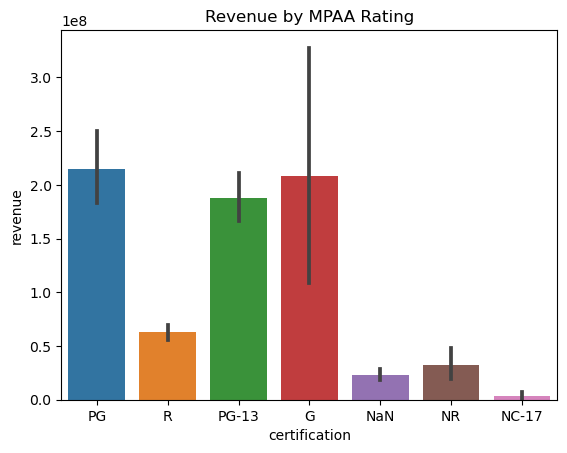

In [41]:
ax = sns.barplot(data=df_ratings, x='certification',y='revenue')
ax.set_title('Revenue by MPAA Rating')

# Conclusion
 - From our pvalue in our Kruskal test, we see that it is less than our alpha (0.05), we can therefore reject our null hypothesis. From our visual above and the table above, we can see that there are significant differences in revenue between our ratings. We see that G, PG-13 and PG movies make amoung the most in revenue. The table also shows that amoung the rating, there are mostly differences between the ratings in terms of revenue generated. 

# Q2: Do movies that are over 2.5 hours long earn more revenue than movies that are 1.5 hours long (or less)?
 - Null Hypothesis: There is no difference in revenue between movies that are over 2.5 hours and movies that are 1.5 hour or less. 
 - Alternative Hypothesis: Movies that are over 2.5 hours long make significantly more revenue than movies that are 1.5 hours or less.

In [42]:
hours_df = df.copy()
hours_df.head()

,imdb_id,adult,belongs_to_collection,budget,genres,popularity,revenue,runtime,title,vote_average,vote_count,certification,genres_list,Genre_Family,Genre_Animation,Genre_Science Fiction,Genre_Thriller,Genre_Mystery,Genre_Drama,Genre_Romance,Genre_Comedy,Genre_War,Genre_Crime,Genre_Action,Genre_Adventure,Genre_Horror,Genre_Fantasy,Genre_History,Genre_Western,Genre_Music,Genre_Documentary,Genre_TV Movie,year,month,day
4,tt0398286,0.0,False,260000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",108.562,5.924617e+08,100.0,Tangled,7.590,10223.0,PG,"[Animation, Family]",True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2010.0,11.0,24.0
6,tt0411951,0.0,True,30000000.0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",21.896,9.670000e+05,92.0,Tekken,5.368,600.0,R,"[Crime, Drama, Action, Thriller, Science Fiction]",False,False,True,True,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False,2010.0,3.0,20.0
9,tt0427152,0.0,False,69000000.0,"[{'id': 35, 'name': 'Comedy'}]",13.637,8.638786e+07,114.0,Dinner for Schmucks,5.692,1601.0,PG-13,[Comedy],False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,2010.0,7.0,30.0
10,tt0429493,0.0,False,110000000.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",31.075,1.772388e+08,117.0,The A-Team,6.393,4206.0,PG-13,"[Thriller, Action, Adventure, Comedy, Crime]",False,False,False,True,False,False,False,True,False,True,True,True,False,False,False,False,False,False,False,2010.0,6.0,9.0
11,tt0435761,0.0,True,200000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",49.445,1.066970e+09,103.0,Toy Story 3,7.792,13435.0,G,"[Animation, Family, Comedy]",True,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,2010.0,6.0,16.0


In [43]:
hours_df['runtime'].isna().sum()

0

In [44]:
hours_df['runtime'].describe()

count    2816.000000
mean      110.335227
std        21.368139
min         0.000000
25%        96.000000
50%       107.000000
75%       122.000000
max       310.000000
Name: runtime, dtype: float64

In [45]:
# Removing moview that are 0 minutes
hours_df.drop(hours_df[hours_df['runtime'] == 0.0].index, inplace = True)

In [46]:
hours_df['runtime'].describe()

count    2807.000000
mean      110.688992
std        20.466804
min        52.000000
25%        96.000000
50%       107.000000
75%       122.000000
max       310.000000
Name: runtime, dtype: float64

In [47]:
hours_df['runtime'].value_counts()

100.0    100
90.0      95
105.0     83
97.0      76
94.0      68
        ... 
60.0       1
209.0      1
181.0      1
171.0      1
162.0      1
Name: runtime, Length: 119, dtype: int64

In [48]:
hours_df['hours'] = hours_df[['runtime']].apply(lambda x: 'more than 2.5' if (x.runtime > 170) 
                                              else 'more than 1.5, less than 2.5' if (x.runtime > 90)
                                              else '1.5 hours or less', axis =1)

In [49]:
hours_df['hours'].value_counts()

more than 1.5, less than 2.5    2400
1.5 hours or less                382
more than 2.5                     25
Name: hours, dtype: int64

In [50]:
hours_df.head()

,imdb_id,adult,belongs_to_collection,budget,genres,popularity,revenue,runtime,title,vote_average,vote_count,certification,genres_list,Genre_Family,Genre_Animation,Genre_Science Fiction,Genre_Thriller,Genre_Mystery,Genre_Drama,Genre_Romance,Genre_Comedy,Genre_War,Genre_Crime,Genre_Action,Genre_Adventure,Genre_Horror,Genre_Fantasy,Genre_History,Genre_Western,Genre_Music,Genre_Documentary,Genre_TV Movie,year,month,day,hours
4,tt0398286,0.0,False,260000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",108.562,5.924617e+08,100.0,Tangled,7.590,10223.0,PG,"[Animation, Family]",True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2010.0,11.0,24.0,"more than 1.5, less than 2.5"
6,tt0411951,0.0,True,30000000.0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",21.896,9.670000e+05,92.0,Tekken,5.368,600.0,R,"[Crime, Drama, Action, Thriller, Science Fiction]",False,False,True,True,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False,2010.0,3.0,20.0,"more than 1.5, less than 2.5"
9,tt0427152,0.0,False,69000000.0,"[{'id': 35, 'name': 'Comedy'}]",13.637,8.638786e+07,114.0,Dinner for Schmucks,5.692,1601.0,PG-13,[Comedy],False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,2010.0,7.0,30.0,"more than 1.5, less than 2.5"
10,tt0429493,0.0,False,110000000.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",31.075,1.772388e+08,117.0,The A-Team,6.393,4206.0,PG-13,"[Thriller, Action, Adventure, Comedy, Crime]",False,False,False,True,False,False,False,True,False,True,True,True,False,False,False,False,False,False,False,2010.0,6.0,9.0,"more than 1.5, less than 2.5"
11,tt0435761,0.0,True,200000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",49.445,1.066970e+09,103.0,Toy Story 3,7.792,13435.0,G,"[Animation, Family, Comedy]",True,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,2010.0,6.0,16.0,"more than 1.5, less than 2.5"


In [51]:
#longer_hours = hours_df.loc[hours_df['runtime'] > 170, "revenue"].copy()
longer_hours = hours_df.loc[hours_df['hours'] == 'more than 2.5', 'revenue'].copy()
longer_hours.head()

1127     20000000.0
5834    130482868.0
6485     28000000.0
7496    256884693.0
9012    392000000.0
Name: revenue, dtype: float64

In [52]:
longer_hours.info()

<class 'pandas.core.series.Series'>
Int64Index: 25 entries, 1127 to 37168
Series name: revenue
Non-Null Count  Dtype  
--------------  -----  
25 non-null     float64
dtypes: float64(1)
memory usage: 400.0 bytes


In [53]:
#shorter_hours = hours_df.loc[((hours_df['runtime'] < 170) & (hours_df['runtime'] <= 90)), "revenue"].copy(\
shorter_hours = hours_df.loc[hours_df['hours'] == '1.5 hours or less', 'revenue'].copy()
shorter_hours.head()

22     83188165.0
42      6007194.0
58      1755212.0
90        20776.0
158     1183258.0
Name: revenue, dtype: float64

In [54]:
shorter_hours.info()

<class 'pandas.core.series.Series'>
Int64Index: 382 entries, 22 to 37553
Series name: revenue
Non-Null Count  Dtype  
--------------  -----  
382 non-null    float64
dtypes: float64(1)
memory usage: 6.0 KB


Outliers

In [55]:
zscore_longer = stats.zscore(longer_hours)
outliers_longer = abs(zscore_longer) > 3
np.sum(outliers_longer)

1

In [56]:
zscore_shorter = stats.zscore(shorter_hours)
outliers_shorter = abs(zscore_shorter) > 3
np.sum(outliers_shorter)

8

In [57]:
longer_hours = longer_hours[(np.abs(stats.zscore(longer_hours)) < 3)]

In [58]:
len(longer_hours)

24

In [59]:
shorter_hours = shorter_hours[(np.abs(stats.zscore(shorter_hours)) < 3)]

In [60]:
len(shorter_hours)

374

Normality Test

In [61]:
norm_longer = stats.normaltest(longer_hours)
norm_longer

NormaltestResult(statistic=29.114793987038148, pvalue=4.762147192716536e-07)

In [62]:
norm_shorter = stats.normaltest(shorter_hours)
norm_shorter

NormaltestResult(statistic=184.09466892484238, pvalue=1.0576709326761374e-40)

* Both of the pvalues for the normality test are below the 0.05, they are not normaly distributed. We can still move on since the sample sizes are large enough. They are above the 15 per group mark. 

Equal Variance Test

In [63]:
variance_result = stats.levene(longer_hours, shorter_hours)
variance_result

LeveneResult(statistic=4.651558166946146, pvalue=0.03162665060281359)

* Our pvalue is not more than 0.05. We do not have equal variance, therefore we will use "equal_var = False" for our t-test. 

In [64]:
ttest_result = stats.ttest_ind(longer_hours, shorter_hours, equal_var = False)
ttest_result

Ttest_indResult(statistic=1.4680607765405065, pvalue=0.15519887206672767)

* Our pvalue < alpha (0.05), so we reject the null hypothesis. 

* For visualization, we will drop movies that are less than 2.5 hours but more than 1.5 hours.

In [65]:
hours_df.drop(hours_df[hours_df['hours'] == 'more than 1.5, less than 2.5'].index, inplace = True)
hours_df['hours'].value_counts()

1.5 hours or less    382
more than 2.5         25
Name: hours, dtype: int64

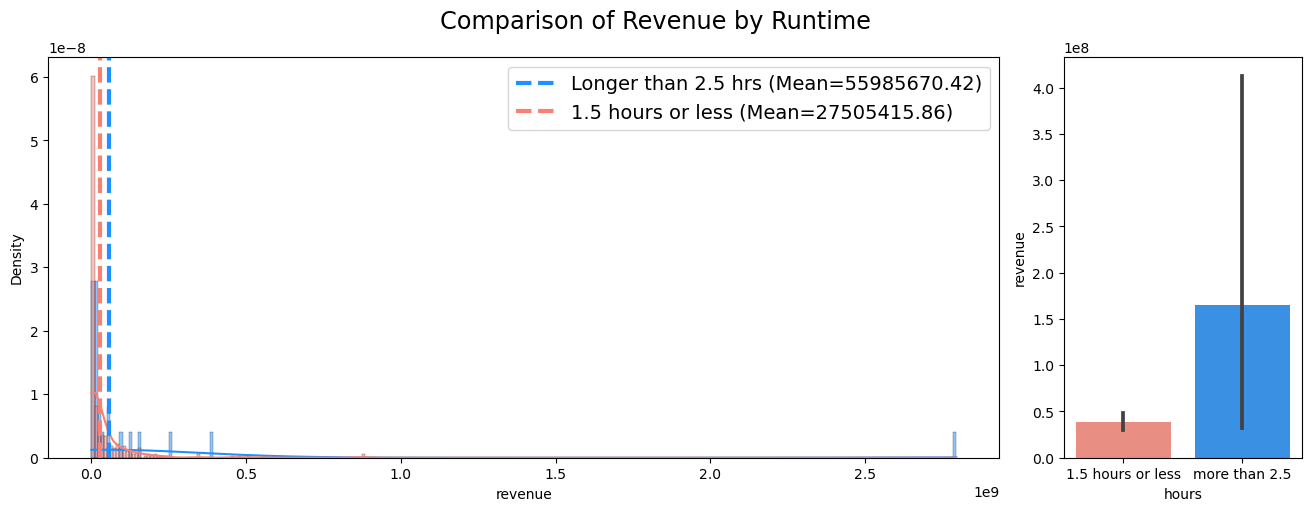

In [66]:
hours_palette={'more than 2.5':'dodgerblue', '1.5 hours or less':'salmon'}
## Visualizing Sample means
fig, (ax,ax_bar) = plt.subplots(figsize= (13,5), ncols=2, 
                                constrained_layout=True,
                                gridspec_kw={'width_ratios':[0.8,0.2]})


# Histogram
ax = sns.histplot(data=hours_df, x='revenue',fill=True,hue='hours',kde=True,
                  stat='density',common_norm=False,ax=ax,
                  palette=hours_palette)

ax.axvline(np.mean(longer_hours), ls='--',lw=3, 
           label=f"Longer than 2.5 hrs (Mean={np.mean(longer_hours):.2f})",color=hours_palette['more than 2.5'])

ax.axvline(np.mean(shorter_hours), ls='--', lw=3, 
           label=f"1.5 hours or less (Mean={np.mean(shorter_hours):.2f})",color=hours_palette['1.5 hours or less'])

ax.legend(prop={"size":14}, loc='upper right')#bbox_to_anchor=[1,1])
## Barplot
sns.barplot(data=hours_df, x='hours',y='revenue',ax = ax_bar,palette=hours_palette)
fig.suptitle('Comparison of Revenue by Runtime',fontsize='xx-large');

* From the visual above, the right figure clearly shows that movies that are more than 2.5 hrs long have higher revenue as compared with movies that are 90 minutes or less. The left figure is less interpretable, since the distribution is off for both groups.

# Conclusion
 - From the pvalue from the ttest, we see that it is less than our alpha (0.05). We therefore reject our null hypothesis. In conjuction with the visual above, we can clearly see than movies that are longer than 2.5 hours generally have a higher revenue. 

# Q3: Do movies that are exclusively in the drama genre make more in revenue than movies that are not exclusively in the drama genre?
 - Null Hypothesis: There is no difference in revenue between movies that are exclusively in the drama genre and movies that are not exclusively in the drama genre.    
 - Alternative Hypothesis: There is a significant difference in revenue between movies that are exclusively in the drama genre and movies that are not exclusively in the drama genre. 

In [67]:
genres_df = df.copy()
genres_df.head()

,imdb_id,adult,belongs_to_collection,budget,genres,popularity,revenue,runtime,title,vote_average,vote_count,certification,genres_list,Genre_Family,Genre_Animation,Genre_Science Fiction,Genre_Thriller,Genre_Mystery,Genre_Drama,Genre_Romance,Genre_Comedy,Genre_War,Genre_Crime,Genre_Action,Genre_Adventure,Genre_Horror,Genre_Fantasy,Genre_History,Genre_Western,Genre_Music,Genre_Documentary,Genre_TV Movie,year,month,day
4,tt0398286,0.0,False,260000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",108.562,5.924617e+08,100.0,Tangled,7.590,10223.0,PG,"[Animation, Family]",True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2010.0,11.0,24.0
6,tt0411951,0.0,True,30000000.0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",21.896,9.670000e+05,92.0,Tekken,5.368,600.0,R,"[Crime, Drama, Action, Thriller, Science Fiction]",False,False,True,True,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False,2010.0,3.0,20.0
9,tt0427152,0.0,False,69000000.0,"[{'id': 35, 'name': 'Comedy'}]",13.637,8.638786e+07,114.0,Dinner for Schmucks,5.692,1601.0,PG-13,[Comedy],False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,2010.0,7.0,30.0
10,tt0429493,0.0,False,110000000.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",31.075,1.772388e+08,117.0,The A-Team,6.393,4206.0,PG-13,"[Thriller, Action, Adventure, Comedy, Crime]",False,False,False,True,False,False,False,True,False,True,True,True,False,False,False,False,False,False,False,2010.0,6.0,9.0
11,tt0435761,0.0,True,200000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",49.445,1.066970e+09,103.0,Toy Story 3,7.792,13435.0,G,"[Animation, Family, Comedy]",True,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,2010.0,6.0,16.0


In [68]:
unique_genres

array(['Family', 'Animation', 'Science Fiction', 'Thriller', 'Mystery',
       'Drama', 'Romance', 'Comedy', 'War', 'Crime', 'Action',
       'Adventure', 'Horror', 'Fantasy', 'History', 'Western', 'Music',
       'Documentary', 'TV Movie'], dtype=object)

In [69]:
## Use our function and exploding the new column
df['genres_list'] = df['genres'].apply(get_genre_name)
df['genres_list'].head()

4                                   [Animation, Family]
6     [Crime, Drama, Action, Thriller, Science Fiction]
9                                              [Comedy]
10         [Thriller, Action, Adventure, Comedy, Crime]
11                          [Animation, Family, Comedy]
Name: genres_list, dtype: object

In [70]:
df['genres_list'].value_counts()

[Drama]                                                    232
[Comedy]                                                   169
[Comedy, Drama]                                             89
[Drama, Romance]                                            77
[Horror, Thriller]                                          55
                                                          ... 
[Fantasy, Adventure, Action, Family, Romance]                1
[Fantasy, Action, Adventure, Animation, Comedy, Family]      1
[Comedy, Action, Fantasy]                                    1
[Action, Mystery, Science Fiction, Thriller]                 1
[Family, Comedy, Drama, Action]                              1
Name: genres_list, Length: 860, dtype: int64

In [71]:
df['genres_list'] = df.genres_list.apply(lambda x: sorted(map(str, x)))

In [72]:
df['genres_list'].value_counts()

[Drama]                                232
[Comedy]                               169
[Comedy, Drama]                        131
[Drama, Romance]                       104
[Comedy, Drama, Romance]                86
                                      ... 
[Action, Adventure, Crime, Drama]        1
[Adventure, Comedy, Horror]              1
[Adventure, Comedy, Drama, History]      1
[Action, Crime, Romance, Thriller]       1
[Animation, Fantasy, Romance]            1
Name: genres_list, Length: 448, dtype: int64

In [73]:
df.head()

,imdb_id,adult,belongs_to_collection,budget,genres,popularity,revenue,runtime,title,vote_average,vote_count,certification,genres_list,Genre_Family,Genre_Animation,Genre_Science Fiction,Genre_Thriller,Genre_Mystery,Genre_Drama,Genre_Romance,Genre_Comedy,Genre_War,Genre_Crime,Genre_Action,Genre_Adventure,Genre_Horror,Genre_Fantasy,Genre_History,Genre_Western,Genre_Music,Genre_Documentary,Genre_TV Movie,year,month,day
4,tt0398286,0.0,False,260000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",108.562,5.924617e+08,100.0,Tangled,7.590,10223.0,PG,"[Animation, Family]",True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2010.0,11.0,24.0
6,tt0411951,0.0,True,30000000.0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",21.896,9.670000e+05,92.0,Tekken,5.368,600.0,R,"[Action, Crime, Drama, Science Fiction, Thriller]",False,False,True,True,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False,2010.0,3.0,20.0
9,tt0427152,0.0,False,69000000.0,"[{'id': 35, 'name': 'Comedy'}]",13.637,8.638786e+07,114.0,Dinner for Schmucks,5.692,1601.0,PG-13,[Comedy],False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,2010.0,7.0,30.0
10,tt0429493,0.0,False,110000000.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",31.075,1.772388e+08,117.0,The A-Team,6.393,4206.0,PG-13,"[Action, Adventure, Comedy, Crime, Thriller]",False,False,False,True,False,False,False,True,False,True,True,True,False,False,False,False,False,False,False,2010.0,6.0,9.0
11,tt0435761,0.0,True,200000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",49.445,1.066970e+09,103.0,Toy Story 3,7.792,13435.0,G,"[Animation, Comedy, Family]",True,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,2010.0,6.0,16.0


In [74]:
genres_df['genres_list'] = [','.join(map(str, l)) for l in df['genres_list']]

In [75]:
genres_df['genres_list'].head()

4                                Animation,Family
6     Action,Crime,Drama,Science Fiction,Thriller
9                                          Comedy
10         Action,Adventure,Comedy,Crime,Thriller
11                        Animation,Comedy,Family
Name: genres_list, dtype: object

In [76]:
genres_df.dropna(subset=['genres_list'], inplace = True)

In [77]:
genres_df['genres_list'].isna().sum()

0

In [78]:
genres_df['genres_list'].value_counts()

Drama                             232
Comedy                            169
Comedy,Drama                      131
Drama,Romance                     104
Comedy,Drama,Romance               86
                                 ... 
Action,Adventure,Crime,Drama        1
Adventure,Comedy,Horror             1
Adventure,Comedy,Drama,History      1
Action,Crime,Romance,Thriller       1
Animation,Fantasy,Romance           1
Name: genres_list, Length: 448, dtype: int64

In [79]:
genres_df['genres_list'].replace('', np.nan, inplace=True)

In [80]:
genres_df['genres_list'].value_counts()

Drama                             232
Comedy                            169
Comedy,Drama                      131
Drama,Romance                     104
Comedy,Drama,Romance               86
                                 ... 
Action,Adventure,Crime,Drama        1
Adventure,Comedy,Horror             1
Adventure,Comedy,Drama,History      1
Action,Crime,Romance,Thriller       1
Animation,Fantasy,Romance           1
Name: genres_list, Length: 447, dtype: int64

In [81]:
genres_df['genres_list'].isna().sum()

9

In [82]:
genres_df.dropna(subset=['genres_list'], inplace = True)

In [83]:
genres_df['genres_list'].isna().sum()

0

In [84]:
genres_df['genres_list'] = genres_df['genres_list'].apply(lambda x: "drama" if x == 'Drama' else "no drama")

In [85]:
genres_df['genres_list'].value_counts()

no drama    2575
drama        232
Name: genres_list, dtype: int64

In [86]:
#longer_hours = hours_df.loc[hours_df['runtime'] > 170, "revenue"].copy()
drama = genres_df.loc[genres_df['genres_list'] == 'drama', 'revenue'].copy()
drama.head()

98      5144717.0
110    93617009.0
145    60321861.0
158     1183258.0
228      399611.0
Name: revenue, dtype: float64

In [87]:
no_drama = genres_df.loc[genres_df['genres_list'] == 'no drama', 'revenue'].copy()
no_drama.head()

4     5.924617e+08
6     9.670000e+05
9     8.638786e+07
10    1.772388e+08
11    1.066970e+09
Name: revenue, dtype: float64

In [88]:
drama.describe()

count    2.320000e+02
mean     2.135087e+07
std      4.631435e+07
min      5.000000e+00
25%      4.141078e+05
50%      3.969444e+06
75%      2.046343e+07
max      4.328447e+08
Name: revenue, dtype: float64

In [89]:
no_drama.describe()

count    2.575000e+03
mean     1.065102e+08
std      2.180554e+08
min      1.000000e+00
25%      3.393639e+06
50%      2.407927e+07
75%      9.961401e+07
max      2.794732e+09
Name: revenue, dtype: float64

In [90]:
print(len(drama))
print(len(no_drama))

232
2575


Outlier assumptions

In [91]:
zscore_drama = stats.zscore(drama)
outliers_drama = abs(zscore_drama) > 3
np.sum(outliers_drama)

6

In [92]:
zscore_no_drama = stats.zscore(no_drama)
outliers_no_drama = abs(zscore_no_drama) > 3
np.sum(outliers_no_drama)

68

In [93]:
drama = drama[(np.abs(stats.zscore(drama)) < 3)]
len(drama)

226

In [94]:
no_drama = no_drama[(np.abs(stats.zscore(no_drama)) < 3)]
len(no_drama)

2507

Normality Test

In [95]:
norm_drama = stats.normaltest(drama)
norm_drama

NormaltestResult(statistic=118.05073293225274, pvalue=2.3206468273667484e-26)

In [96]:
norm_no_drama = stats.normaltest(no_drama)
norm_no_drama

NormaltestResult(statistic=1387.480813962509, pvalue=5.156670415721271e-302)

* Both of the pvalues for the normality test are below the 0.05, they are not normaly distributed. We can still move on since the sample sizes are large enough. They are above the 15 per group mark.

Equal Variance Test

In [97]:
variance_result = stats.levene(drama, no_drama)
variance_result

LeveneResult(statistic=50.14699871438782, pvalue=1.8069829177243022e-12)

* Our pvalue is not more than 0.05. We do not have equal variance, therefore we will use "equal_var = False" for our t-test.

T-Test

In [98]:
ttest_result = stats.ttest_ind(drama, no_drama, equal_var = False)
ttest_result

Ttest_indResult(statistic=-19.95129446927105, pvalue=1.7534606874692913e-79)

* The pvalue for the ttest is less than alpha (0.05), therefore we reject the null hypothesis. 

* Our pvalue < alpha (0.05), so we reject the null hypothesis.

# Making genres_list values 'yes' and 'no' values only for if it is exclusively a drama genre or not. This will make making our visuals easier.

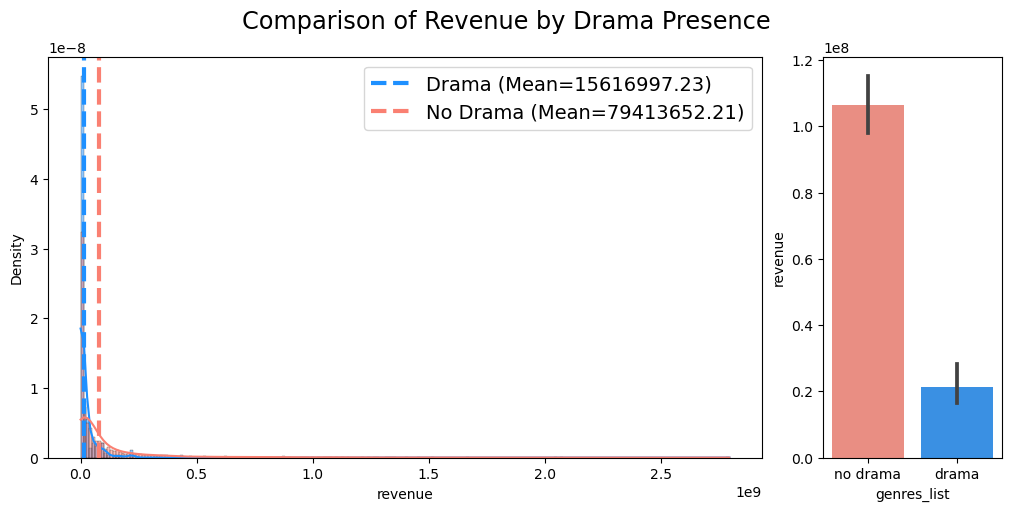

In [99]:
drama_palette={'drama':'dodgerblue', 'no drama':'salmon'}
## Visualizing Sample means
fig, (ax,ax_bar) = plt.subplots(figsize= (10,5), ncols=2, 
                                constrained_layout=True,
                                gridspec_kw={'width_ratios':[0.8,0.2]})


# Histogram
ax = sns.histplot(data=genres_df, x='revenue',fill=True,hue='genres_list',kde=True,
                  stat='density',common_norm=False,ax=ax,
                  palette=drama_palette)

ax.axvline(np.mean(drama), ls='--',lw=3, 
           label=f"Drama (Mean={np.mean(drama):.2f})",color=drama_palette['drama'])

ax.axvline(np.mean(no_drama), ls='--', lw=3, 
           label=f"No Drama (Mean={np.mean(no_drama):.2f})",color=drama_palette['no drama'])

ax.legend(prop={"size":14}, loc='upper right')#bbox_to_anchor=[1,1])
## Barplot
sns.barplot(data=genres_df, x='genres_list',y='revenue',ax = ax_bar,palette=drama_palette)
fig.suptitle('Comparison of Revenue by Drama Presence',fontsize='xx-large');

* From the visual above, the right figure clearly shows that movies are not exclusively dramatic have higher revenue as compared with movies that are exclusively dramatic. The left figure is less interpretable, since the distribution is off for both groups.

# Conclusion
 - From the pvalue from the ttest, we see that it is less than our alpha (0.05). We therefore reject our null hypothesis. In conjuction with the visual above, we can clearly see than movies that are not exclusively dramatic generally have a higher revenue. 